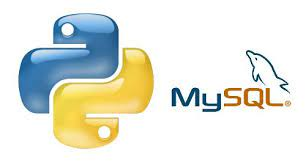

#### Introduction to SQL

SQL stands for Structural Query Language, and SQL is used for storing, manipulation, and retrieving data from the database.

#### History of SQL

The SQL(Structural Query language) was first created in the 1970s by IBM researchers Raymond Boyce and Donald Chamberlin. The Query language, known then as SEQUEL, was created following the publishing of Edgar Frank Todd's paper, In 1970, A Relational Model of Data for Large Shared Data Banks. In his paper, Todd proposed that all the data in a database be represented in the form of relations. It was based on this theory that Chamberlin and Boyce came up with SQL. The original SQL version was designed to retrieve and manipulate data stored in IBM's original RDBMS known as "System R." It wasn't until several years later, however, that the Structural Query language was made available publicly. In 1979, a company named as Relational Software, which later became Oracle, commercially released its version of the SQL language called Oracle V2. Since that time, the American National Standards Institute (ANSI) and the International Standards Organization have deemed the SQL language as the standard language in relational database communication. While major SQL vendors do modify the language to their desires, most base their SQL programs off of the ANSI approved version.


#### What is Database?

A database is a well-ordered collection of data. A database is an electronic system that permits data to be easily manipulated, accessed, and updated, or an organization uses a database as a method of managing, storing, and retrieving information. Modern databases are handled using a database management system (DBMS).

#### Relational Database

Relational Databases are used to store data in tables (rows and columns). Some common relational database management systems that use SQL are Oracle, Sybase, Microsoft SQL Server, Access, Ingres, etc.

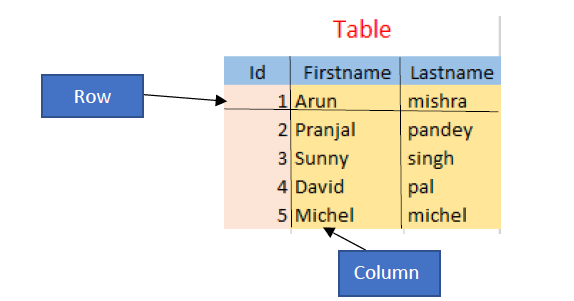

#### SQL and Relational Databases

A Relational Database contains tables that store the data that is related in some way. SQL is the query language that allows retrieval and manipulation of table data in the relational database. The database below has two tables: one with data on Users and another with data on Products.

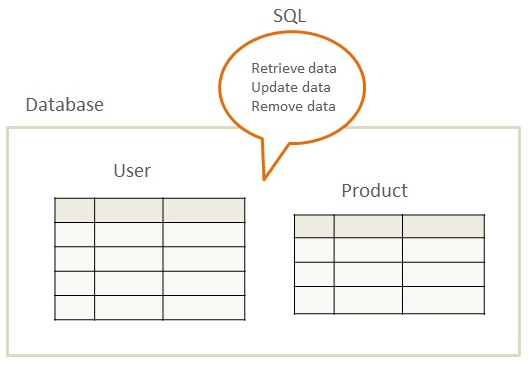

**How to run SQL Query on the local system**

To run the SQL query on the local system, we need to install the MYSQL community server on the system. We have given step by step installation process below.

**SQL Query**

A database most often contains tables. Some name identifies each table. The table includes records(rows) with Data. To access those records, we need SQL Syntax. Most of the action you need to perform Database by using the SQL Statement.

Note: SQL keywords are not case-sensitive (e.g., select as SELECT)

* The syntax of the language describes the language element.
* SQL syntax is somewhat like simple English sentences.
* Keywords include SELECT, UPDATE, WHERE, ORDER BY ETC.


Four fundamental operations that can apply to any databases are:
1. Read the Data -- **SELECT**
2. Insert the new Data -- **INSERT**
3. Update existing Data -- **UPDATE**
4. Remove Data –- **DELETE**

These operations are referred to as the CRUD (Create, Read, Update, Delete).

**Let's connect our MySQL server using Python**

In [2]:
# Let's import all the necessay liberary 

import pandas as pd
import numpy as np
import mysql.connector

In [3]:
# Let's connect with the local SQL server

connection = mysql.connector.connect(
host = "localhost",
password ="*****",
user='root'
)

# Checking if the connection is established with SQL server

if connection.is_connected():
    print("Connection Established...")

Connection Established...


Creating a cursor for all operations:

In [4]:
cursor = connection.cursor(buffered=True)
cursor

In [5]:
# Fetch and print the results
query = "show databases"
database = cursor.execute(query)
databases = cursor.fetchall()
for database in databases:
    print(database[0])


information_schema
mukesh
mysql
performance_schema
sakila
sys
testdb
world


All the above are the databases which are by default stored into the MySQL. In this excersise I will be using **sakila** database.


In [6]:
# I will be using sakila database 

use_database_query = "use sakila"
cursor.execute(use_database_query)


In [7]:
# I needed to see all the tables present inside my database

see_database_tables = "show tables"
cursor.execute(see_database_tables)
# Fetch all table names
tables = cursor.fetchall()

 # Print the list of table names
print("Tables in the database:")

# Storing all the tables into a dataframe
list_of_tables = []

for table in tables:
    list_of_tables.append(table[0])
    
print(list_of_tables)

Tables in the database:
['actor', 'actor_info', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'nicer_but_slower_film_list', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store']


From all the above tables I will be using customer table for all my CURD operations.

**SQL select query:** a SELECT statement is used to retrieve data from one or more tables in a database. It allows you to specify which columns you want to retrieve and apply various conditions to filter the results. Here's the **basic syntax of a SELECT statement:**

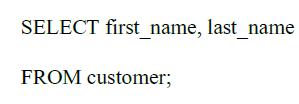

In [8]:
# from the customer data I needed to get all the records 

customer_data_query = "select * from customer" #-> * is used to select all the data from table
cursor.execute(customer_data_query)
customer_data = cursor.fetchall() # It will fetch all my data 
# to display all the values 

df = pd.DataFrame(customer_data, columns=[value[0] for value in cursor.description])
print(df)


     customer_id  store_id first_name  last_name  \
0              1         1       MARY      SMITH   
1              2         1   PATRICIA    JOHNSON   
2              3         1      LINDA   WILLIAMS   
3              4         2    BARBARA      JONES   
4              5         1  ELIZABETH      BROWN   
..           ...       ...        ...        ...   
594          595         1   TERRENCE  GUNDERSON   
595          596         1    ENRIQUE   FORSYTHE   
596          597         1    FREDDIE     DUGGAN   
597          598         1       WADE   DELVALLE   
598          599         2     AUSTIN    CINTRON   

                                     email  address_id  active  \
0            MARY.SMITH@sakilacustomer.org           5       1   
1      PATRICIA.JOHNSON@sakilacustomer.org           6       1   
2        LINDA.WILLIAMS@sakilacustomer.org           7       1   
3         BARBARA.JONES@sakilacustomer.org           8       1   
4       ELIZABETH.BROWN@sakilacustomer.org   

In [9]:
# Store the same values in dataframe
customer_data_query = "SELECT * FROM customer"
cursor.execute(customer_data_query)
customer_data = cursor.fetchall()
df = pd.DataFrame(customer_data, columns=[desc[0] for desc in cursor.description])
print(df)

     customer_id  store_id first_name  last_name  \
0              1         1       MARY      SMITH   
1              2         1   PATRICIA    JOHNSON   
2              3         1      LINDA   WILLIAMS   
3              4         2    BARBARA      JONES   
4              5         1  ELIZABETH      BROWN   
..           ...       ...        ...        ...   
594          595         1   TERRENCE  GUNDERSON   
595          596         1    ENRIQUE   FORSYTHE   
596          597         1    FREDDIE     DUGGAN   
597          598         1       WADE   DELVALLE   
598          599         2     AUSTIN    CINTRON   

                                     email  address_id  active  \
0            MARY.SMITH@sakilacustomer.org           5       1   
1      PATRICIA.JOHNSON@sakilacustomer.org           6       1   
2        LINDA.WILLIAMS@sakilacustomer.org           7       1   
3         BARBARA.JONES@sakilacustomer.org           8       1   
4       ELIZABETH.BROWN@sakilacustomer.org   

In [10]:
# I need to select the first and last name from the customers 

select_first_and_last_name = "select first_name, last_name from customer"
cursor.execute(select_first_and_last_name)
name_data = cursor.fetchall()
df = pd.DataFrame(name_data, columns=[value[0] for value in cursor.description])
print(df)


    first_name  last_name
0         MARY      SMITH
1     PATRICIA    JOHNSON
2        LINDA   WILLIAMS
3      BARBARA      JONES
4    ELIZABETH      BROWN
..         ...        ...
594   TERRENCE  GUNDERSON
595    ENRIQUE   FORSYTHE
596    FREDDIE     DUGGAN
597       WADE   DELVALLE
598     AUSTIN    CINTRON

[599 rows x 2 columns]


**SQL SELECT DISTINCT:** The SELECT DISTINCT statement is used to retrieve unique values from a specified column in a table. It ensures that the result set contains only distinct (unique) values, eliminating any duplicates. Here's how you can use it:

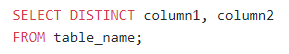

In [11]:
# I needed to select the distinct first names for customer table.

distinct_first_names = "select distinct first_name from customer"
cursor.execute(distinct_first_names)
first_names = cursor.fetchall()
df = pd.DataFrame(first_names, columns=[value[0] for value in cursor.description])
print(df)

    first_name
0         MARY
1     PATRICIA
2        LINDA
3      BARBARA
4    ELIZABETH
..         ...
585   TERRENCE
586    ENRIQUE
587    FREDDIE
588       WADE
589     AUSTIN

[590 rows x 1 columns]


**SQL WHERE CLAUSE:** The WHERE clause allows the user to filter the data from the table. The WHERE clause allows the user to extract only those records that satisfy a specified condition.

* When we access, the Text value: SQL requires single quotes around text values (many database systems will also use double quotes). And numeric fields should not be enclosed in quotes.
* When we access the Numeric field: No quotes is required.

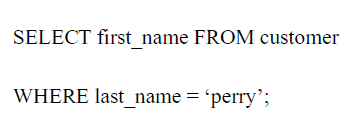

In [12]:
# When you needed to filter out the text data
where_name_condition="select first_name from customer where last_name='perry'"
cursor.execute(where_name_condition)
name_condition = cursor.fetchall()

for name in name_condition:
    print(name)


('SARA',)


In [13]:
# When you needed to filter out numerical data
numerical_fetching_data = "select first_name, last_name from customer where active=0"
cursor.execute(numerical_fetching_data)
numerical_data = cursor.fetchall()
df = pd.DataFrame(numerical_data, columns=[value[0] for value in cursor.description])
print(df)


   first_name  last_name
0      SANDRA     MARTIN
1      JUDITH        COX
2      SHEILA      WELLS
3       ERICA   MATTHEWS
4       HEIDI     LARSON
5       PENNY       NEAL
6     KENNETH     GOODEN
7      mukesh       ARCE
8      NATHAN     RUNYON
9    THEODORE       CULP
10    MAURICE    CRAWLEY
11        BEN     EASTER
12  CHRISTIAN       JUNG
13     JIMMIE  EGGLESTON
14   TERRANCE      ROUSH


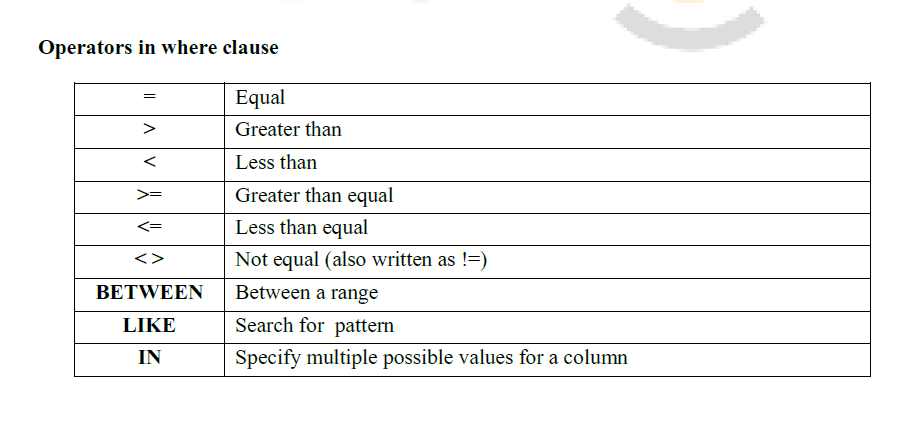

#### SQL WHERE CLAUSE WITH AND, OR & NOT

In [14]:
# AND
fetch_data_using_and = "select * from customer where first_name = 'IAN' and last_name = 'still'"
cursor.execute(fetch_data_using_and)
data_using_and = cursor.fetchall()

for and_fetch_data in data_using_and:
    print(and_fetch_data)

(561, 2, 'IAN', 'STILL', 'IAN.STILL@sakilacustomer.org', 567, 1, datetime.datetime(2006, 2, 14, 22, 4, 37), datetime.datetime(2006, 2, 15, 4, 57, 20))


In [15]:
# NOT

fetch_data_using_not = "select first_name, last_name, email, address_id from customer where not store_id=2"
cursor.execute(fetch_data_using_not)
data_using_not = cursor.fetchall()

df = pd.DataFrame(data_using_not, columns=[value[0] for value in cursor.description])
print(df)

    first_name  last_name                                  email  address_id
0         MARY      SMITH          MARY.SMITH@sakilacustomer.org           5
1     PATRICIA    JOHNSON    PATRICIA.JOHNSON@sakilacustomer.org           6
2        LINDA   WILLIAMS      LINDA.WILLIAMS@sakilacustomer.org           7
3    ELIZABETH      BROWN     ELIZABETH.BROWN@sakilacustomer.org           9
4        MARIA     MILLER        MARIA.MILLER@sakilacustomer.org          11
..         ...        ...                                    ...         ...
321    EDUARDO      HIATT       EDUARDO.HIATT@sakilacustomer.org         600
322   TERRENCE  GUNDERSON  TERRENCE.GUNDERSON@sakilacustomer.org         601
323    ENRIQUE   FORSYTHE    ENRIQUE.FORSYTHE@sakilacustomer.org         602
324    FREDDIE     DUGGAN      FREDDIE.DUGGAN@sakilacustomer.org         603
325       WADE   DELVALLE       WADE.DELVALLE@sakilacustomer.org         604

[326 rows x 4 columns]


In [16]:
# OR
fetch_data_using_or = "select * from customer where first_name = 'IAN' or last_name = 'still'"
cursor.execute(fetch_data_using_or)
data_using_or = cursor.fetchall()

for or_fetch_data in data_using_and:
    print(or_fetch_data)

(561, 2, 'IAN', 'STILL', 'IAN.STILL@sakilacustomer.org', 567, 1, datetime.datetime(2006, 2, 14, 22, 4, 37), datetime.datetime(2006, 2, 15, 4, 57, 20))


**SQL UPDATE**

In [17]:
update_data_in_database = "update customer set first_name='Mukesh' where last_name='grey'"
cursor.execute(update_data_in_database)

# let's see my data is updated or not

check_for_mukesh = "select first_name from customer where first_name='mukesh'"
cursor.execute(check_for_mukesh)
name_update = cursor.fetchall()

for name in name_update:
    print(name)


('mukesh',)
('Mukesh',)


**SQL ORDER BY:** Order by is used to print the values from the table in order(ascending or descending)

In [18]:
# Order by in descending

data_in_descending_order = "select first_name, last_name, email from customer order by first_name desc"
cursor.execute(data_in_descending_order)
desending_order_data = cursor.fetchall()

df = pd.DataFrame(desending_order_data, columns=[value[0] for value in cursor.description])
print(df)

    first_name last_name                              email
0      ZACHARY      HITE    ZACHARY.HITE@sakilacustomer.org
1       YVONNE   WATKINS  YVONNE.WATKINS@sakilacustomer.org
2      YOLANDA    WEAVER  YOLANDA.WEAVER@sakilacustomer.org
3        WILMA  RICHARDS  WILMA.RICHARDS@sakilacustomer.org
4       WILLIE    HOWELL   WILLIE.HOWELL@sakilacustomer.org
..         ...       ...                                ...
594       ALAN      KAHN       ALAN.KAHN@sakilacustomer.org
595      AGNES    BISHOP    AGNES.BISHOP@sakilacustomer.org
596     ADRIAN     CLARY    ADRIAN.CLARY@sakilacustomer.org
597       ADAM     GOOCH      ADAM.GOOCH@sakilacustomer.org
598      AARON     SELBY     AARON.SELBY@sakilacustomer.org

[599 rows x 3 columns]


In [19]:
# Order by in ascending

data_in_ascending_order = "select first_name, last_name, email from customer order by first_name asc"
cursor.execute(data_in_ascending_order)
ascending_order_data = cursor.fetchall()

df = pd.DataFrame(ascending_order_data, columns=[value[0] for value in cursor.description])
print(df)


    first_name last_name                              email
0        AARON     SELBY     AARON.SELBY@sakilacustomer.org
1         ADAM     GOOCH      ADAM.GOOCH@sakilacustomer.org
2       ADRIAN     CLARY    ADRIAN.CLARY@sakilacustomer.org
3        AGNES    BISHOP    AGNES.BISHOP@sakilacustomer.org
4         ALAN      KAHN       ALAN.KAHN@sakilacustomer.org
..         ...       ...                                ...
594     WILLIE   MARKHAM  WILLIE.MARKHAM@sakilacustomer.org
595      WILMA  RICHARDS  WILMA.RICHARDS@sakilacustomer.org
596    YOLANDA    WEAVER  YOLANDA.WEAVER@sakilacustomer.org
597     YVONNE   WATKINS  YVONNE.WATKINS@sakilacustomer.org
598    ZACHARY      HITE    ZACHARY.HITE@sakilacustomer.org

[599 rows x 3 columns]


**SQL SELECT TOP CLAUSE:** The SELECT TOP is used to specify the number of records from the to return. The SELECT TOP is useful on large tables with millions of records. It is returning a large number of records that can impact performance.

**Note:** Not all database systems support the SELECT TOP clause. MySQL supports the LIMIT clause to select a limited number of records, while Oracle uses ROWNUM.



In [20]:
# select top clause

select_top_records = "select first_name,last_name,email,address_id from customer where first_name = 'mukesh' limit 10"
cursor.execute(select_top_records)
select_records = cursor.fetchall()

for records in select_records:
    print(records)


('mukesh', 'ARCE', 'HARRY.ARCE@sakilacustomer.org', 373)
('Mukesh', 'GREY', 'ROSS.GREY@sakilacustomer.org', 586)


In [21]:
# select top clause

select_top_records = "select first_name,last_name,email,address_id from customer limit 10"
cursor.execute(select_top_records)
select_records = cursor.fetchall()

df = pd.DataFrame(select_records, columns=[records[0] for records in cursor.description])
print(df)



  first_name last_name                                email  address_id
0       MARY     SMITH        MARY.SMITH@sakilacustomer.org           5
1   PATRICIA   JOHNSON  PATRICIA.JOHNSON@sakilacustomer.org           6
2      LINDA  WILLIAMS    LINDA.WILLIAMS@sakilacustomer.org           7
3    BARBARA     JONES     BARBARA.JONES@sakilacustomer.org           8
4  ELIZABETH     BROWN   ELIZABETH.BROWN@sakilacustomer.org           9
5   JENNIFER     DAVIS    JENNIFER.DAVIS@sakilacustomer.org          10
6      MARIA    MILLER      MARIA.MILLER@sakilacustomer.org          11
7      SUSAN    WILSON      SUSAN.WILSON@sakilacustomer.org          12
8   MARGARET     MOORE    MARGARET.MOORE@sakilacustomer.org          13
9    DOROTHY    TAYLOR    DOROTHY.TAYLOR@sakilacustomer.org          14


**SQL MIN() AND MAX() FUNCTION:** The MIN() function in SQL returns the smallest value of the selected column from the table. The MAX() function in SQL returns the largest value of the selected column from the table.

In [22]:
# Selecting the minimum value 

minimum_data = "select min(address_id) from customer"
cursor.execute(minimum_data)
minimum_address = cursor.fetchall()

for min_address in minimum_address:
    print(min_address)

(5,)


In [23]:
# Selecting maximum value 

maximum_data = "select max(address_id) from customer"
cursor.execute(maximum_data)
maximum_address = cursor.fetchall()

for max_address in maximum_address:
    print(max_address)

(605,)


**SQL COUNT(), AVG() AND SUM() FUNCTION:** The COUNT() function gives the number of rows that matches specified conditions. And the AVG() function in SQL returns the average value of a numeric column. The SUM() function in SQL returns the total sum of a numeric column.

In [24]:
# Count --> total number of email 

count_email = "select count(email) from customer"
cursor.execute(count_email)
count_email_ = cursor.fetchall()

for _count_email in count_email_:
    print(_count_email)

(599,)


In [25]:
# Avg --> average of active users

avg_active_users = "select avg(active) from customer"
cursor.execute(avg_active_users)
_avg_active_users = cursor.fetchall()

for avg_user in _avg_active_users:
    print(avg_user)

(Decimal('0.9750'),)


In [26]:
# Sum of active users 

sum_of_active_users = "select sum(active) from customer"
cursor.execute(sum_of_active_users)
_active_users = cursor.fetchall()

for active_users in _active_users:
    print(active_users)

(Decimal('584'),)


**SQL LIKE-OPERATOR:** The LIKE operator is used with the WHERE clause to find for a specified pattern in an attribute. The two wildcards are used in conjunction with the LIKE operator:

* % - it represents zero, one, or multiple characters
* _ - it represents a single character

The ‘%’ and the ‘_’ can also be used in combinations.

In [27]:
# Selects all columns of the customer with a first_name starting with "D".

starting_with_D = "select * from customer where first_name like '%D'"
cursor.execute(starting_with_D)
user_name_with_D = cursor.fetchall()

df = pd.DataFrame(user_name_with_D, columns=[desc[0] for desc in cursor.description])
print(df)

    customer_id  store_id first_name  last_name  \
0            60         1    MILDRED     BAILEY   
1           304         2      DAVID      ROYAL   
2           305         1    RICHARD    MCCRARY   
3           313         2     DONALD      MAHON   
4           317         2     EDWARD      BAUGH   
5           319         2     RONALD     WEINER   
6           334         2    RAYMOND  MCWHORTER   
7           342         1     HAROLD    MARTINO   
8           356         2     GERALD      FULTZ   
9           369         2       FRED      WHEAT   
10          377         1     HOWARD    FORTNER   
11          386         1       TODD        TAN   
12          405         1    LEONARD  SCHOFIELD   
13          419         1       CHAD    CARBONE   
14          423         2     ALFRED   CASILLAS   
15          440         1    BERNARD      COLBY   
16          447         1   CLIFFORD     BOWENS   
17          458         1      LLOYD       DOWD   
18          465         1      

In [28]:
# Selects all columns of the customer with a first_name starting with "E".

starting_with_E = "select * from customer where first_name like '%E'"
cursor.execute(starting_with_E)
user_name_with_E = cursor.fetchall()

df = pd.DataFrame(user_name_with_E, columns=[desc[0] for desc in cursor.description])
print(df)

     customer_id  store_id first_name  last_name  \
0             21         1   MICHELLE      CLARK   
1             41         1  STEPHANIE   MITCHELL   
2             43         2  CHRISTINE    ROBERTS   
3             44         1      MARIE     TURNER   
4             46         2  CATHERINE   CAMPBELL   
..           ...       ...        ...        ...   
121          593         2       RENE  MCALISTER   
122          595         1   TERRENCE  GUNDERSON   
123          596         1    ENRIQUE   FORSYTHE   
124          597         1    FREDDIE     DUGGAN   
125          598         1       WADE   DELVALLE   

                                     email  address_id  active  \
0        MICHELLE.CLARK@sakilacustomer.org          25       1   
1    STEPHANIE.MITCHELL@sakilacustomer.org          45       1   
2     CHRISTINE.ROBERTS@sakilacustomer.org          47       1   
3          MARIE.TURNER@sakilacustomer.org          48       1   
4    CATHERINE.CAMPBELL@sakilacustomer.org   

In [29]:
# Selects all columns of the customer with a first_name that have "or" in any position.

starting_with_E = "select * from customer where first_name like '%or'"
cursor.execute(starting_with_E)
user_name_with_E = cursor.fetchall()

df = pd.DataFrame(user_name_with_E, columns=[desc[0] for desc in cursor.description])
print(df)

   customer_id  store_id first_name   last_name  \
0          148         1    ELEANOR        HUNT   
1          382         2     VICTOR     BARKLEY   
2          487         2     HECTOR  POINDEXTER   
3          584         2   SALVADOR        TEEL   

                                  email  address_id  active  \
0       ELEANOR.HUNT@sakilacustomer.org         152       1   
1     VICTOR.BARKLEY@sakilacustomer.org         387       1   
2  HECTOR.POINDEXTER@sakilacustomer.org         492       1   
3      SALVADOR.TEEL@sakilacustomer.org         590       1   

          create_date         last_update  
0 2006-02-14 22:04:36 2006-02-15 04:57:20  
1 2006-02-14 22:04:37 2006-02-15 04:57:20  
2 2006-02-14 22:04:37 2006-02-15 04:57:20  
3 2006-02-14 22:04:37 2006-02-15 04:57:20  


In [30]:
# Selects all columns of the customer with a first_name that starts with "a" and ends with "o":

starting_with_a_or = "select * from customer where first_name like 'a%o'"
cursor.execute(starting_with_a_or)
user_name_with_a_or = cursor.fetchall()

df = pd.DataFrame(user_name_with_a_or, columns=[desc[0] for desc in cursor.description])
print(df)

   customer_id  store_id first_name last_name  \
0          398         1    ANTONIO      MEEK   
1          556         2    ARMANDO    GRUBER   
2          567         2    ALFREDO   MCADAMS   
3          568         2    ALBERTO   HENNING   

                                email  address_id  active         create_date  \
0     ANTONIO.MEEK@sakilacustomer.org         403       1 2006-02-14 22:04:37   
1   ARMANDO.GRUBER@sakilacustomer.org         562       1 2006-02-14 22:04:37   
2  ALFREDO.MCADAMS@sakilacustomer.org         573       1 2006-02-14 22:04:37   
3  ALBERTO.HENNING@sakilacustomer.org         574       1 2006-02-14 22:04:37   

          last_update  
0 2006-02-15 04:57:20  
1 2006-02-15 04:57:20  
2 2006-02-15 04:57:20  
3 2006-02-15 04:57:20  


In [31]:
# Selects all columns of the customer with a first_name that starts with "a" and are at least six characters in length:

starting_with_a_or = "select * from customer where first_name like 'a______'"
cursor.execute(starting_with_a_or)
user_name_with_a_or = cursor.fetchall()

df = pd.DataFrame(user_name_with_a_or, columns=[desc[0] for desc in cursor.description])
print(df)

   customer_id  store_id first_name last_name  \
0          175         1    ANNETTE     OLSON   
1          228         2    ALLISON   STANLEY   
2          320         2    ANTHONY    SCHWAB   
3          398         1    ANTONIO      MEEK   
4          556         2    ARMANDO    GRUBER   
5          567         2    ALFREDO   MCADAMS   
6          568         2    ALBERTO   HENNING   

                                email  address_id  active         create_date  \
0    ANNETTE.OLSON@sakilacustomer.org         179       1 2006-02-14 22:04:36   
1  ALLISON.STANLEY@sakilacustomer.org         232       1 2006-02-14 22:04:36   
2   ANTHONY.SCHWAB@sakilacustomer.org         325       1 2006-02-14 22:04:37   
3     ANTONIO.MEEK@sakilacustomer.org         403       1 2006-02-14 22:04:37   
4   ARMANDO.GRUBER@sakilacustomer.org         562       1 2006-02-14 22:04:37   
5  ALFREDO.MCADAMS@sakilacustomer.org         573       1 2006-02-14 22:04:37   
6  ALBERTO.HENNING@sakilacustomer.org   

**SQL IN AND NOT IN OPERATORS:** The IN operator allows users to specify multiple values in a WHERE clause. The IN operator is a shorthand for various OR conditions.

In [32]:
# Selects all the columns of customer whose customer_id in (1,2,3)

customer_id_ = "select * from customer where customer_id in (1,2,3)"
cursor.execute(customer_id_)
customer = cursor.fetchall()

df = pd.DataFrame(customer, columns=[ids[0] for ids in cursor.description])
print(df)


   customer_id  store_id first_name last_name  \
0            1         1       MARY     SMITH   
1            2         1   PATRICIA   JOHNSON   
2            3         1      LINDA  WILLIAMS   

                                 email  address_id  active  \
0        MARY.SMITH@sakilacustomer.org           5       1   
1  PATRICIA.JOHNSON@sakilacustomer.org           6       1   
2    LINDA.WILLIAMS@sakilacustomer.org           7       1   

          create_date         last_update  
0 2006-02-14 22:04:36 2006-02-15 04:57:20  
1 2006-02-14 22:04:36 2006-02-15 04:57:20  
2 2006-02-14 22:04:36 2006-02-15 04:57:20  


In [33]:
# Not 1,2,3

customer_id_ = "select * from customer where customer_id not in (1,2,3)"
cursor.execute(customer_id_)
customer = cursor.fetchall()

df = pd.DataFrame(customer, columns=[ids[0] for ids in cursor.description])
print(df)


     customer_id  store_id first_name  last_name  \
0              4         2    BARBARA      JONES   
1              5         1  ELIZABETH      BROWN   
2              6         2   JENNIFER      DAVIS   
3              7         1      MARIA     MILLER   
4              8         2      SUSAN     WILSON   
..           ...       ...        ...        ...   
591          595         1   TERRENCE  GUNDERSON   
592          596         1    ENRIQUE   FORSYTHE   
593          597         1    FREDDIE     DUGGAN   
594          598         1       WADE   DELVALLE   
595          599         2     AUSTIN    CINTRON   

                                     email  address_id  active  \
0         BARBARA.JONES@sakilacustomer.org           8       1   
1       ELIZABETH.BROWN@sakilacustomer.org           9       1   
2        JENNIFER.DAVIS@sakilacustomer.org          10       1   
3          MARIA.MILLER@sakilacustomer.org          11       1   
4          SUSAN.WILSON@sakilacustomer.org   

**SQL BETWEEN OPERATOR:** The BETWEEN operator retrieves values within the given range. The values can be texts, numbers, or dates. The BETWEEN operator is inclusive: begin and end values are included.

In [34]:
# Select all the columns from the customer with customer_id between 1 to 20.

customer_range = "select * from customer where customer_id between 1 and 20"
cursor.execute(customer_range)
range_of_customer = cursor.fetchall()

df = pd.DataFrame(range_of_customer, columns=[i[0] for i in cursor.description])
print(df)

    customer_id  store_id first_name last_name  \
0             1         1       MARY     SMITH   
1             2         1   PATRICIA   JOHNSON   
2             3         1      LINDA  WILLIAMS   
3             4         2    BARBARA     JONES   
4             5         1  ELIZABETH     BROWN   
5             6         2   JENNIFER     DAVIS   
6             7         1      MARIA    MILLER   
7             8         2      SUSAN    WILSON   
8             9         2   MARGARET     MOORE   
9            10         1    DOROTHY    TAYLOR   
10           11         2       LISA  ANDERSON   
11           12         1      NANCY    THOMAS   
12           13         2      KAREN   JACKSON   
13           14         2      BETTY     WHITE   
14           15         1      HELEN    HARRIS   
15           16         2     SANDRA    MARTIN   
16           17         1      DONNA  THOMPSON   
17           18         2      CAROL    GARCIA   
18           19         1       RUTH  MARTINEZ   


In [35]:
# Select all the columns from the customer with customer_id, not between 1 to 570.

customer_range = "select * from customer where customer_id not between 1 and 500"
cursor.execute(customer_range)
range_of_customer = cursor.fetchall()

df = pd.DataFrame(range_of_customer, columns=[i[0] for i in cursor.description])
print(df)

    customer_id  store_id first_name  last_name  \
0           501         1      RUBEN      GEARY   
1           502         1      BRETT   CORNWELL   
2           503         1      ANGEL    BARCLAY   
3           504         1  NATHANIEL       ADAM   
4           505         1     RAFAEL      ABNEY   
..          ...       ...        ...        ...   
94          595         1   TERRENCE  GUNDERSON   
95          596         1    ENRIQUE   FORSYTHE   
96          597         1    FREDDIE     DUGGAN   
97          598         1       WADE   DELVALLE   
98          599         2     AUSTIN    CINTRON   

                                    email  address_id  active  \
0          RUBEN.GEARY@sakilacustomer.org         506       1   
1       BRETT.CORNWELL@sakilacustomer.org         507       1   
2        ANGEL.BARCLAY@sakilacustomer.org         508       1   
3       NATHANIEL.ADAM@sakilacustomer.org         509       1   
4         RAFAEL.ABNEY@sakilacustomer.org         510       1 

**SQL ALIAS:** Aliases are used to give a nickname to a column in a table, a temporary name. Aliases are used to make column names more readable to the user.

In [36]:
# Creates two aliases, one for the first_name column and one for the last_name column:

alias_name = "select first_name as first, last_name as last from customer"
cursor.execute(alias_name)
alias = cursor.fetchall()

df = pd.DataFrame(alias, columns=[i[0] for i in cursor.description])
print(df)

         first       last
0         MARY      SMITH
1     PATRICIA    JOHNSON
2        LINDA   WILLIAMS
3      BARBARA      JONES
4    ELIZABETH      BROWN
..         ...        ...
594   TERRENCE  GUNDERSON
595    ENRIQUE   FORSYTHE
596    FREDDIE     DUGGAN
597       WADE   DELVALLE
598     AUSTIN    CINTRON

[599 rows x 2 columns]


**SQL GROUP BY STATEMENT** The GROUP BY used to group rows from the table. And it has the same values as summary rows. For example, find the number of customers in each country, The GROUP BY is often used with aggregate functions like (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.

In [37]:
# Count the number of active and non-active customers
group_by_active = "select count(customer_id) from customer group by active"
cursor.execute(group_by_active)
active_members = cursor.fetchall() 

df = pd.DataFrame(active_members, columns=[i[0] for i in cursor.description])
print(df)

   count(customer_id)
0                 584
1                  15


**SQL UNION** The UNION operator allows the user to combine the result-set of two or more SELECT statements in SQL. Each SELECT statement within UNION should have the same number of columns. The columns in each SELECT statement should also be in the same order. The columns should also have similar data types.

In [38]:
union_query = "select first_name, last_name from customer union select address from customer_list"
cursor.execute(union_query)
union_query_execute = cursor.fetchall()

df = pd.DataFrame(union_query_execute, columns=[i[0] for i in cursor.description])
print(df)

DataError: 1222 (21000): The used SELECT statements have a different number of columns

In [39]:
test = "select * from city"
cursor.execute(test)
test_1 = cursor.fetchall()

df = pd.DataFrame(test_1, columns=[i[0] for i in cursor.description])
print(df)

     city_id                  city  country_id         last_update
0          1  A Coruña (La Coruña)          87 2006-02-15 04:45:25
1          2                  Abha          82 2006-02-15 04:45:25
2          3             Abu Dhabi         101 2006-02-15 04:45:25
3          4                 Acuña          60 2006-02-15 04:45:25
4          5                 Adana          97 2006-02-15 04:45:25
..       ...                   ...         ...                 ...
595      596                 Zaria          69 2006-02-15 04:45:25
596      597          Zeleznogorsk          80 2006-02-15 04:45:25
597      598           Zhezqazghan          51 2006-02-15 04:45:25
598      599              Zhoushan          23 2006-02-15 04:45:25
599      600            Ziguinchor          83 2006-02-15 04:45:25

[600 rows x 4 columns]


In [40]:
test = "select * from country"
cursor.execute(test)
test_1 = cursor.fetchall()

df = pd.DataFrame(test_1, columns=[i[0] for i in cursor.description])
print(df)

     country_id               country         last_update
0             1           Afghanistan 2006-02-15 04:44:00
1             2               Algeria 2006-02-15 04:44:00
2             3        American Samoa 2006-02-15 04:44:00
3             4                Angola 2006-02-15 04:44:00
4             5              Anguilla 2006-02-15 04:44:00
..          ...                   ...                 ...
104         105               Vietnam 2006-02-15 04:44:00
105         106  Virgin Islands, U.S. 2006-02-15 04:44:00
106         107                 Yemen 2006-02-15 04:44:00
107         108            Yugoslavia 2006-02-15 04:44:00
108         109                Zambia 2006-02-15 04:44:00

[109 rows x 3 columns]


**SQL JOIN** The SQL Join help in retrieving data from two or more database tables. The tables are mutually related using primary keys and foreign keys.

***Type of Join:***

* **INNER JOIN:** The INNER JOIN is used to print rows from both tables that satisfy the given condition. For example, the user wants to get a list of users who have rented movies together with titles of movies rented by them. Users can use an INNER JOIN for that, which returns rows from both tables that satisfy with given conditions.

![Alt text](image-1.png)

The INNER JOIN keyword selects records that have matching values in both the tables.

In [41]:
inner_join = "select city.city_id, country.country, city.last_update, country.last_update from city inner join country on city.country_id = country.country_id"
cursor.execute(inner_join)
inner_join_execution = cursor.fetchall()

df = pd.DataFrame(inner_join_execution, columns=[i[0] for i in cursor.description])
print(df)

     city_id         country         last_update         last_update
0        251     Afghanistan 2006-02-15 04:45:25 2006-02-15 04:44:00
1         59         Algeria 2006-02-15 04:45:25 2006-02-15 04:44:00
2         63         Algeria 2006-02-15 04:45:25 2006-02-15 04:44:00
3        483         Algeria 2006-02-15 04:45:25 2006-02-15 04:44:00
4        516  American Samoa 2006-02-15 04:45:25 2006-02-15 04:44:00
..       ...             ...                 ...                 ...
595      455           Yemen 2006-02-15 04:45:25 2006-02-15 04:44:00
596      518           Yemen 2006-02-15 04:45:25 2006-02-15 04:44:00
597      280      Yugoslavia 2006-02-15 04:45:25 2006-02-15 04:44:00
598      368      Yugoslavia 2006-02-15 04:45:25 2006-02-15 04:44:00
599      272          Zambia 2006-02-15 04:45:25 2006-02-15 04:44:00

[600 rows x 4 columns]


**LEFT JOIN** The LEFT JOIN returns all the records from the table1 (left table) and the matched records from the table2 (right table). The output is NULL from the right side if there is no match.

![Alt text](image-2.png)

In [42]:
left_join = "select city.city_id, country.country, city.last_update, country.last_update FROM city left join country ON city.country_id = country.country_id"
cursor.execute(left_join)
left_join_execution = cursor.fetchall()

df = pd.DataFrame(left_join_execution, columns=[i[0] for i in cursor.description])
print(df)


     city_id               country         last_update         last_update
0          1                 Spain 2006-02-15 04:45:25 2006-02-15 04:44:00
1          2          Saudi Arabia 2006-02-15 04:45:25 2006-02-15 04:44:00
2          3  United Arab Emirates 2006-02-15 04:45:25 2006-02-15 04:44:00
3          4                Mexico 2006-02-15 04:45:25 2006-02-15 04:44:00
4          5                Turkey 2006-02-15 04:45:25 2006-02-15 04:44:00
..       ...                   ...                 ...                 ...
595      596               Nigeria 2006-02-15 04:45:25 2006-02-15 04:44:00
596      597    Russian Federation 2006-02-15 04:45:25 2006-02-15 04:44:00
597      598             Kazakstan 2006-02-15 04:45:25 2006-02-15 04:44:00
598      599                 China 2006-02-15 04:45:25 2006-02-15 04:44:00
599      600               Senegal 2006-02-15 04:45:25 2006-02-15 04:44:00

[600 rows x 4 columns]


**RIGHT JOIN** The RIGHT JOIN is the opposite of LEFT JOIN. The RIGHT JOIN prints all the columns from the table2(right table) even if there no matching rows have been found in the table1 (left table). If there no matches have been found in the table (left table), NULL is returned.

![Alt text](image-3.png)

In [43]:
right_join = "SELECT city.city_id, country.country, city.last_update, country.last_update FROM city RIGHT JOIN country ON city.country_id = country.country_id"
cursor.execute(left_join)
right_join_execution = cursor.fetchall()

df = pd.DataFrame(right_join_execution, columns=[i[0] for i in cursor.description])
print(df)


     city_id               country         last_update         last_update
0          1                 Spain 2006-02-15 04:45:25 2006-02-15 04:44:00
1          2          Saudi Arabia 2006-02-15 04:45:25 2006-02-15 04:44:00
2          3  United Arab Emirates 2006-02-15 04:45:25 2006-02-15 04:44:00
3          4                Mexico 2006-02-15 04:45:25 2006-02-15 04:44:00
4          5                Turkey 2006-02-15 04:45:25 2006-02-15 04:44:00
..       ...                   ...                 ...                 ...
595      596               Nigeria 2006-02-15 04:45:25 2006-02-15 04:44:00
596      597    Russian Federation 2006-02-15 04:45:25 2006-02-15 04:44:00
597      598             Kazakstan 2006-02-15 04:45:25 2006-02-15 04:44:00
598      599                 China 2006-02-15 04:45:25 2006-02-15 04:44:00
599      600               Senegal 2006-02-15 04:45:25 2006-02-15 04:44:00

[600 rows x 4 columns]


**Full OUTER JOIN** The FULL OUTER JOIN keyword returns all records when there are a match in left (table1) or right (table2) table records.
**Note:** FULL OUTER JOIN can potentially return very large result-sets! 

![Alt text](image-4.png)

FULL OUTER JOIN and FULL JOIN are the same.

Note: MySQL does not support the Full Join, so we can perform left join and right join separately then take the union of them.

**SQL CREATE DATABASE STATEMENT:** The CREATE DATABASE statement in SQL is used to create a new SQL database.

In [48]:
# Creating a database and check it continously
drop_data_base_if_exits = "drop database if EXISTS Mukesh"
cursor.execute(drop_data_base_if_exits)


# Recreating the same database 
create_database = "create database Mukesh"
cursor.execute(create_database)

In [49]:
# Show database

show_data = "show databases"
cursor.execute(show_data)
list_db = cursor.fetchall()

df = pd.DataFrame(list_db, columns=[i[0] for i in cursor.description])
print(df)

             Database
0  information_schema
1              mukesh
2               mysql
3  performance_schema
4              sakila
5                 sys
6              testdb
7               world


**SQL CREATE TABLE** The CREATE TABLE statement in SQL is used to create a new table in a database.

In [58]:
# Select the DATABASE

select_database = "use mukesh"
cursor.execute(select_database)

# Drop table if already exists in mukesh database

drop_if_table_exits = "drop table if exists employee_table"
cursor.execute(drop_if_table_exits)

# Creating table 
create_table = "create table employee_table(employee_id integer, first_name varchar(50), last_name varchar(50), experience integer, DOJ date)"
cursor.execute(create_table)


In [59]:
# let's check weather my table is created with all the column names

table = "select * from employee_table"
cursor.execute(table)
check_for_table = cursor.fetchall()

df = pd.DataFrame(check_for_table, columns=[i[0] for i in cursor.description])
df


,employee_id,first_name,last_name,experience,DOJ


From the above output I can see that table is create and I have no Input data available in it. 

My next stpe will be inserting the value into the table

**SQL INSERT INTO STATEMENT** The INSERT INTO statement in SQL is used to insert new records in a table.

* We can write the INSERT INTO statement in two ways. The first way is to specify both the column names and the values to be inserted:-->
INSERT INTO customer(id , first_name, last_name ,city ,country,phone)VALUES (2, ‘Ana’, ‘Trujillo’, ‘Mexico’, ‘Mexico’, (5) 555-4729);
* If users are adding values for all the columns of the table, you don’t need to specify the particular column names in the SQL query. However, ensure the order of the values is in the same order as the columns in the table.



In [60]:
# I will be passing 100 records to my database

from faker import Faker
import random

fake = Faker()

for _ in range(100):
    employee_id = _ + 1
    first_name = fake.first_name()
    last_name = fake.last_name()
    experience = random.randint(0, 20)  # Random experience between 0 and 20 years
    DOJ = fake.date_of_birth(minimum_age=22, maximum_age=60)  # Random date of joining

    insert_query = "INSERT INTO employee_table (employee_id, first_name, last_name, experience, DOJ) VALUES (%s, %s, %s, %s, %s)"
    data = (employee_id, first_name, last_name, experience, DOJ)

    cursor.execute(insert_query, data)

In [61]:
# Lets check the records in the table


table = "select * from employee_table"
cursor.execute(table)
check_for_table = cursor.fetchall()

df = pd.DataFrame(check_for_table, columns=[i[0] for i in cursor.description])
df


,employee_id,first_name,last_name,experience,DOJ
0,1,Lisa,Mason,7,1981-08-15
1,2,Kelly,Lane,1,1997-06-17
2,3,Thomas,Wilson,19,1996-10-30
3,4,Anthony,Nelson,3,1969-09-13
4,5,Raymond,Campos,9,1973-01-20
...,...,...,...,...,...
95,96,Juan,Petersen,19,1964-05-09
96,97,Leah,Thomas,14,1981-01-26
97,98,Christopher,Watson,14,1993-09-07
98,99,Cindy,Walker,1,1966-12-12


**SQL NULL VALUES** The field with a NULL value is a field with no value. If the field in a table is optional, to insert new data or update data without adding a value to this field and Then, the field will be saved as a NULL value.


Note: A NULL value is not the same as a zero value, or we can say a field that holds spaces. The field with a NULL value is one that has been left blank during record creation!

In [65]:
# Try second method of inserting values into table 
insert_new_record = "INSERT INTO employee_table VALUES (101, 'Rohan', 'Bhatt', NULL, '1970-12-20')"
cursor.execute(insert_new_record)


In [66]:
# Lets check the records in the table if its updated or not

table = "select * from employee_table"
cursor.execute(table)
check_for_table = cursor.fetchall()

df = pd.DataFrame(check_for_table, columns=[i[0] for i in cursor.description])
df


,employee_id,first_name,last_name,experience,DOJ
0,1,Lisa,Mason,7.0,1981-08-15
1,2,Kelly,Lane,1.0,1997-06-17
2,3,Thomas,Wilson,19.0,1996-10-30
3,4,Anthony,Nelson,3.0,1969-09-13
4,5,Raymond,Campos,9.0,1973-01-20
...,...,...,...,...,...
96,97,Leah,Thomas,14.0,1981-01-26
97,98,Christopher,Watson,14.0,1993-09-07
98,99,Cindy,Walker,1.0,1966-12-12
99,100,Renee,Walsh,16.0,1991-09-13


To test for NULL values in the table has to use the IS NULL and IS NOT NULL operators instead.

In [67]:
# IS NULL

check_using_is_null = "select * from employee_table where experience is null"
cursor.execute(check_using_is_null)
null_values = cursor.fetchall()

df = pd.DataFrame(null_values, columns=[i[0] for i in cursor.description])
df

,employee_id,first_name,last_name,experience,DOJ
0,101,Rohan,Bhatt,None,1970-12-20


In [68]:
# I only needed to check those columns that have no null values 
check_for_non_null_values ="select * from employee_table where experience is not null"
cursor.execute(check_for_non_null_values)
not_null_values = cursor.fetchall()

df = pd.DataFrame(not_null_values, columns=[i[0] for i in cursor.description])
df

,employee_id,first_name,last_name,experience,DOJ
0,1,Lisa,Mason,7,1981-08-15
1,2,Kelly,Lane,1,1997-06-17
2,3,Thomas,Wilson,19,1996-10-30
3,4,Anthony,Nelson,3,1969-09-13
4,5,Raymond,Campos,9,1973-01-20
...,...,...,...,...,...
95,96,Juan,Petersen,19,1964-05-09
96,97,Leah,Thomas,14,1981-01-26
97,98,Christopher,Watson,14,1993-09-07
98,99,Cindy,Walker,1,1966-12-12


**SQL UPDATE STATEMENT** The UPDATE statement in SQL is used to modify the existing records in a table.

In [69]:
update_table_employee = "update employee_table set first_name = 'Mukesh' where employee_id=1"
cursor.execute(update_table_employee)

In [70]:
# Check if my value is updated or not 

table = "select * from employee_table"
cursor.execute(table)
check_for_table = cursor.fetchall()

df = pd.DataFrame(check_for_table, columns=[i[0] for i in cursor.description])
df

,employee_id,first_name,last_name,experience,DOJ
0,1,Mukesh,Mason,7.0,1981-08-15
1,2,Kelly,Lane,1.0,1997-06-17
2,3,Thomas,Wilson,19.0,1996-10-30
3,4,Anthony,Nelson,3.0,1969-09-13
4,5,Raymond,Campos,9.0,1973-01-20
...,...,...,...,...,...
96,97,Leah,Thomas,14.0,1981-01-26
97,98,Christopher,Watson,14.0,1993-09-07
98,99,Cindy,Walker,1.0,1966-12-12
99,100,Renee,Walsh,16.0,1991-09-13


**SQL DELETE STATEMENT** The DELETE statement in SQL is used to delete existing records in a table.

In [75]:
delete_records = "DELETE from employee_table where employee_id=101"
cursor.execute(delete_records)

In [83]:
# Check if my value is deleted or not 

table = "select * from employee_table"
cursor.execute(table)
check_for_table = cursor.fetchall()

df = pd.DataFrame(check_for_table, columns=[i[0] for i in cursor.description])
df

,employee_id,first_name,last_name,experience,DOJ
0,1,Mukesh,Mason,7,1981-08-15
1,2,Kelly,Lane,1,1997-06-17
2,3,Thomas,Wilson,19,1996-10-30
3,4,Anthony,Nelson,3,1969-09-13
4,5,Raymond,Campos,9,1973-01-20
...,...,...,...,...,...
95,96,Juan,Petersen,19,1964-05-09
96,97,Leah,Thomas,14,1981-01-26
97,98,Christopher,Watson,14,1993-09-07
98,99,Cindy,Walker,1,1966-12-12


**ALTER TABLE - ADD COLUMN IN EXISTING TABLE** The ALTER TABLE statement in SQL is used to add, modify, or delete columns in an existing table. And it also used to add and drop various constraints on a current table.

In [84]:
alter_column = "ALTER TABLE employee_table ADD COLUMN email VARCHAR(255)"
cursor.execute(alter_column)

In [87]:
 # Generate and insert email addresses based on first_name and last_name
cursor.execute("SELECT employee_id, first_name, last_name FROM employee_table")
records = cursor.fetchall()
        
for record in records:
    employee_id, first_name, last_name = record
    email = f"{first_name.lower()}.{last_name.lower()}@example.com"  # Generate email based on first and last name
            
    update_query = "UPDATE employee_table SET email = %s WHERE employee_id = %s"
    data = (email, employee_id)
            
    cursor.execute(update_query, data)

In [88]:
# Check if my new column is update or not 


table = "select * from employee_table"
cursor.execute(table)
check_for_table = cursor.fetchall()

df = pd.DataFrame(check_for_table, columns=[i[0] for i in cursor.description])
df

,employee_id,first_name,last_name,experience,DOJ,email
0,1,Mukesh,Mason,7,1981-08-15,mukesh.mason@example.com
1,2,Kelly,Lane,1,1997-06-17,kelly.lane@example.com
2,3,Thomas,Wilson,19,1996-10-30,thomas.wilson@example.com
3,4,Anthony,Nelson,3,1969-09-13,anthony.nelson@example.com
4,5,Raymond,Campos,9,1973-01-20,raymond.campos@example.com
...,...,...,...,...,...,...
95,96,Juan,Petersen,19,1964-05-09,juan.petersen@example.com
96,97,Leah,Thomas,14,1981-01-26,leah.thomas@example.com
97,98,Christopher,Watson,14,1993-09-07,christopher.watson@example.com
98,99,Cindy,Walker,1,1966-12-12,cindy.walker@example.com


**SQL CONSTRAINTS**  The Constraints in SQL can be specified when the table is created with the CREATE TABLE statement, or after the table is altered with the ALTER TABLE statement.

![Alt text](image-5.png)

SQL constraints are used to specify any rules for the records in a table. Constraints can be used to limit the type of data that can go into a table. It ensures the accuracy and reliability of the records in the table, and if there is any violation between the constraint and the record action, the action is aborted. Constraints can be column level or table level. Column level constraints apply to a column, and table-level constraints apply to the whole table.

![Alt text](image-6.png)

**NOT NULL CONSTRAINTS** 

The NOT NULL constraint enforces a column NOT to accept NULL values. This imposes a field always to contain a value, which means that the user cannot insert a new record in a table or update a record without adding a value to this field.

NOTE: By default, a column can hold NULL values.



In [89]:
# Create a table using SQL not null constraints

not_null_constraints = "create table student(id int not null, first_name varchar(25), last_name varchar(25), age int)"
cursor.execute(not_null_constraints)

In [94]:
# lets check its dtype
describe_table = "desc student"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df

,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,,None,
1,first_name,b'varchar(25)',YES,,None,
2,last_name,b'varchar(25)',YES,,None,
3,age,b'int',NO,,None,


**SQL NOT NULL on ALTER table Statement** To make a NOT NULL constraint on the "age" column when the "student" table is already created

In [93]:
alter_not_null = "alter table student modify age int not null"
cursor.execute(alter_not_null)


In [95]:
# lets check its dtype
describe_table = "desc student"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df

,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,,None,
1,first_name,b'varchar(25)',YES,,None,
2,last_name,b'varchar(25)',YES,,None,
3,age,b'int',NO,,None,


**SQL UNIQUE CONSTRAINT** The UNIQUE constraint in SQL ensures that all values in a column are distinct. UNIQUE and PRIMARY KEY constraints both provides a guarantee for uniqueness for a column or group of columns. A PRIMARY KEY constraint, by default, has a UNIQUE constraint. However, the user can have many UNIQUE constraints per table, but only one PRIMARY KEY constraint per table.

In [101]:
# Creates UNIQUE constraint on the "id" column when the "person" table is created
alter_not_null_unique = "create table person2( id int not null, first_name varchar(24), age int, unique(id))"
cursor.execute(alter_not_null_unique)

# lets check its dtype
describe_table = "desc person1"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df



,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,PRI,None,
1,first_name,b'varchar(24)',YES,,None,
2,age,b'int',YES,,None,


In [98]:
# lets check its dtype
describe_table = "desc student"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df


,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,,None,
1,first_name,b'varchar(25)',YES,,None,
2,last_name,b'varchar(25)',YES,,None,
3,age,b'int',NO,,None,


Create a UNIQUE constraint on the "first_name" column when the "persons" table already exists.

In [104]:

drop_if_table_exits = "drop table if exists person2"
cursor.execute(drop_if_table_exits)

# Creates UNIQUE constraint on the "id" column when the "person" table is created
alter_not_null_unique = "create table person2( id int not null, first_name varchar(24), age int, unique(id))"
cursor.execute(alter_not_null_unique)


# Creates UNIQUE constraint on the "id" column when the "person" table is created

alter_not_null_unique = "ALTER TABLE person2 ADD UNIQUE (first_name)"
cursor.execute(alter_not_null_unique)

# lets check its dtype
describe_table = "desc person2"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df



,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,PRI,None,
1,first_name,b'varchar(24)',YES,UNI,None,
2,age,b'int',YES,,None,


**SQL PRIMARY KEY CONSTRAINTS** The PRIMARY KEY constraint uniquely identifies each of the records in a table. Only ONE primary key can have in a table. And also, in the table, this primary key can consist of single or multiple columns (fields). Primary keys should contain UNIQUE values, and cannot contain NULL values.

In [106]:
# Will drop if the table exists 
drop_if_table_exits = "drop table if exists person"
cursor.execute(drop_if_table_exits)

# Creating a new table
create_new_table = "CREATE TABLE person(ID int NOT NULL, last_name varchar(255) NOT NULL, first_name varchar(255), age int, PRIMARY KEY(ID))"
cursor.execute(create_new_table)

# lets check its dtype
describe_table = "desc person"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df



,Field,Type,Null,Key,Default,Extra
0,ID,b'int',NO,PRI,None,
1,last_name,b'varchar(255)',NO,,None,
2,first_name,b'varchar(255)',YES,,None,
3,age,b'int',YES,,None,


To allow the naming of a PRIMARY KEY constraint, and for defining a PRIMARY KEY constraint on multiple columns, use the SQL syntax.

In [107]:
# Will drop if the table exists 
drop_if_table_exits = "drop table if exists person"
cursor.execute(drop_if_table_exits)

# Creating a new table
create_new_table = "CREATE TABLE person (id int NOT NULL, last_name varchar(255) NOT NULL, first_name varchar(255), age int, CONSTRAINT PK_person PRIMARY KEY (id,last_name))"
cursor.execute(create_new_table)

# lets check its dtype
describe_table = "desc person"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df



,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,PRI,None,
1,last_name,b'varchar(255)',NO,PRI,None,
2,first_name,b'varchar(255)',YES,,None,
3,age,b'int',YES,,None,


In [108]:
query = "ALTER TABLE student ADD PRIMARY KEY (id)"
cursor.execute(query)


In [109]:
# lets check its dtype
describe_table = "desc student"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df


,Field,Type,Null,Key,Default,Extra
0,id,b'int',NO,PRI,None,
1,first_name,b'varchar(25)',YES,,None,
2,last_name,b'varchar(25)',YES,,None,
3,age,b'int',NO,,None,


**SQL FOREIGN KEY CONSTRAINT** A FOREIGN KEY is used to link two tables together. It is sometimes also called a referencing key. Foreign Key is a combination of columns (can be single column) whose value matches a Primary Key in the different tables. The relationship between two tables matches the Primary Key in one of the tables with a Foreign Key in the second table. If the table contains a primary key defined on any field, then the user should not have two records having the equal value of that field.

Let’s create two tables using the foreign key

In [122]:
# Will drop if the table exists 
drop_if_table_exits = "drop table if exists customer"
cursor.execute(drop_if_table_exits)

customer_table = "CREATE TABLE customer(Id int NOT NULL,Name varchar(20) NOT NULL,Age int NOT NULL,Address varchar(25) ,Salary decimal (18, 2),PRIMARY KEY (id))"
cursor.execute(customer_table)

# lets check its dtype
describe_table = "desc customer"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df


,Field,Type,Null,Key,Default,Extra
0,Id,b'int',NO,PRI,None,
1,Name,b'varchar(20)',NO,,None,
2,Age,b'int',NO,,None,
3,Address,b'varchar(25)',YES,,None,
4,Salary,"b'decimal(18,2)'",YES,,None,


create second table order 

In [124]:
# Will drop if the table exists 
drop_if_table_exits = "drop table if exists customer1"
cursor.execute(drop_if_table_exits)

customer_table = "CREATE TABLE customer1(Id int NOT NULL,Name varchar(20) NOT NULL,Age int NOT NULL,Address varchar(25) ,Salary decimal (18, 2),PRIMARY KEY (id))"
cursor.execute(customer_table)

# lets check its dtype
describe_table = "desc customer1"
cursor.execute(describe_table)
table_describe = cursor.fetchall()

df = pd.DataFrame(table_describe, columns=[i[0] for i in cursor.description])
df


,Field,Type,Null,Key,Default,Extra
0,Id,b'int',NO,PRI,None,
1,Name,b'varchar(20)',NO,,None,
2,Age,b'int',NO,,None,
3,Address,b'varchar(25)',YES,,None,
4,Salary,"b'decimal(18,2)'",YES,,None,


![Alt text](image-7.png)